# Mar.io

## 1. On importe les bibliothèques

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

## 2. On charge le dataset depuis Kaggle

In [5]:
data = pd.read_csv(r'C:\Users\Aerlaw\Documents\Cours et TP Bachelor\IA\primary_data.csv', sep=';')
data.head()

,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
0,Amanita Family,Fly Agaric,p,"[10, 20]","[x, f]","[g, h]","[e, o]",[f],[e],NaN,...,[s],[y],[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a, w]"
1,Amanita Family,Panther Cap,p,"[5, 10]","[p, x]",[g],[n],[f],[e],NaN,...,NaN,[y],[w],[u],[w],[t],[p],NaN,[d],"[u, a]"
2,Amanita Family,False Panther Cap,p,"[10, 15]","[x, f]",NaN,"[g, n]",[f],[e],NaN,...,NaN,NaN,[w],[u],[w],[t],"[e, g]",NaN,[d],"[u, a]"
3,Amanita Family,The Blusher,e,"[5, 15]","[x, f]",NaN,[n],[t],NaN,NaN,...,[b],NaN,[w],[u],[w],[t],[g],NaN,[d],"[u, a]"
4,Amanita Family,Death Cap,p,"[5, 12]","[x, f]",[h],[r],[f],NaN,[c],...,NaN,NaN,[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a]"


## 3. Prétraitement des données

### On convertie en binaire les étiquettes

In [8]:
data['class'] = data['class'].map({'e': 0, 'p': 1})

### On sépare les caractéristiques et les étiquettes

In [10]:
X = data.drop(columns=['class', 'name'])
y = data['class']

### On transforme les variables catégorielles en variables numériques

In [12]:
X = pd.get_dummies(X)

### On convertie les booléens en int

In [14]:
X = X.astype(int)

### On normalise les caractéristiques

In [16]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Séparation des données en ensembles d'entraînement et de validation

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Construction du modèle

In [20]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

### On le compile

In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Le résumé

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        63,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,985 (289.00 KB)

 Trainable params: 73,985 (289.00 KB)

 Non-trainable params: 0 (0.00 B)

## 5. Entraînement du modèle

### Callback/early_stopping

In [27]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Epoch 1/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - accuracy: 0.4566 - loss: 0.7154 - val_accuracy: 0.5429 - val_loss: 0.6925
Epoch 2/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5555 - loss: 0.6781 - val_accuracy: 0.5429 - val_loss: 0.6917
Epoch 3/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5552 - loss: 0.6945 - val_accuracy: 0.4857 - val_loss: 0.6921
Epoch 4/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5754 - loss: 0.6747 - val_accuracy: 0.5429 - val_loss: 0.6921
Epoch 5/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5611 - loss: 0.6801 - val_accuracy: 0.5143 - val_loss: 0.6917
Epoch 6/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5262 - loss: 0.6961 - val_accuracy: 0.5143 - val_loss: 0.6930
Epoch 7/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5820 - loss: 0.6673 - val_accuracy: 0.5143 - val_loss: 0.6923


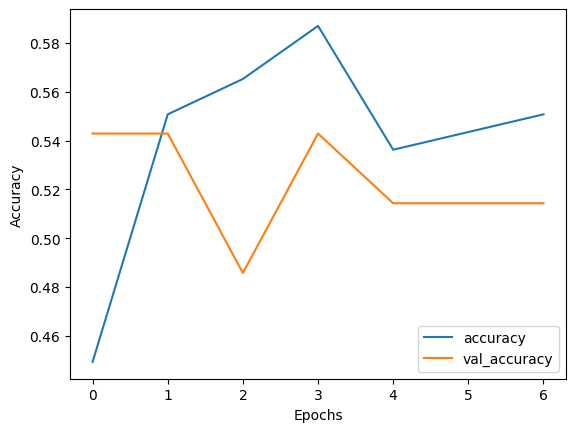

In [28]:
history = model.fit(X_train, y_train, epochs=80, validation_data=(X_val, y_val), callbacks=[early_stopping])

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

## 6. Evaluation du modèle

In [30]:
y_pred = (model.predict(X_val) > 0.5).astype("int32")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


### Calcul des métriques

In [32]:
cm = confusion_matrix(y_val, y_pred)
report = classification_report(y_val, y_pred)

print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

Confusion Matrix:
 [[ 3 14]
 [ 2 16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.18      0.27        17
           1       0.53      0.89      0.67        18

    accuracy                           0.54        35
   macro avg       0.57      0.53      0.47        35
weighted avg       0.57      0.54      0.48        35



## 7. On réajuste le modèle

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

### On le compile

In [37]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### On définie l'arrêt anticipé

In [39]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

### On entraîne le modèle avec l'early stopping

In [41]:
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping])

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms/step - accuracy: 0.4448 - loss: 1.0414 - val_accuracy: 0.3929 - val_loss: 1.0099
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4099 - loss: 1.0176 - val_accuracy: 0.5000 - val_loss: 0.9900
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5859 - loss: 0.9713 - val_accuracy: 0.6071 - val_loss: 0.9759
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6020 - loss: 0.9603 - val_accuracy: 0.5714 - val_loss: 0.9641
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6670 - loss: 0.9309 - val_accuracy: 0.5357 - val_loss: 0.9541
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6707 - loss: 0.9098 - val_accuracy: 0.5357 - val_loss: 0.9453
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7045 - loss: 0.8907 - val_accuracy: 0.5357 - val_loss: 0.9373
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6779 - loss: 0.8723 - val_accuracy: 0.5357 - val_loss

### 8. On continue de tester des modèles

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping])

# Enregistrer le modèle au format .h5
model.save('mushroom_classifier_model.h5')

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 0.6098 - loss: 2.2078 - val_accuracy: 0.6429 - val_loss: 2.1206
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5499 - loss: 2.1061 - val_accuracy: 0.6429 - val_loss: 2.0138
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5567 - loss: 1.9933 - val_accuracy: 0.6071 - val_loss: 1.9151
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5515 - loss: 1.9036 - val_accuracy: 0.6071 - val_loss: 1.8239
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6098 - loss: 1.8082 - val_accuracy: 0.6071 - val_loss: 1.7404
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6332 - loss: 1.7041 - val_accuracy: 0.5714 - val_loss: 1.6638
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5895 - loss: 1.6521 - val_accuracy: 0.5714 - val_loss: 1.5939
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6639 - loss: 1.5665 - val_accuracy: 0.5714 - val_loss

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 220ms/step - accuracy: 0.4922 - loss: 4.2747 - val_accuracy: 0.6071 - val_loss: 3.8062 - learning_rate: 0.0010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4907 - loss: 3.9317 - val_accuracy: 0.5000 - val_loss: 3.6793 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5676 - loss: 3.7302 - val_accuracy: 0.5000 - val_loss: 3.5664 - learning_rate: 0.0010
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5120 - loss: 3.6685 - val_accuracy: 0.5357 - val_loss: 3.4653 - learning_rate: 0.0010
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5900 - loss: 3.4879 - val_accuracy: 0.5357 - val_loss: 3.3745 - learning_rate: 0.0010
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6446 - loss: 3.3116 - val_accuracy: 0.5714 - val_loss: 3.2927 - learning_rate: 0.0010
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6160 - loss: 3.2993 - val_accuracy:

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 195ms/step - accuracy: 0.4370 - loss: 2.8316 - val_accuracy: 0.6071 - val_loss: 2.3729 - learning_rate: 0.0010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4963 - loss: 2.6191 - val_accuracy: 0.5714 - val_loss: 2.3073 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5484 - loss: 2.5731 - val_accuracy: 0.6071 - val_loss: 2.2499 - learning_rate: 0.0010
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5213 - loss: 2.4941 - val_accuracy: 0.6071 - val_loss: 2.1992 - learning_rate: 0.0010
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6779 - loss: 2.1920 - val_accuracy: 0.6786 - val_loss: 2.1540 - learning_rate: 0.0010
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5827 - loss: 2.3508 - val_accuracy: 0.7143 - val_loss: 2.1130 - learning_rate: 0.0010
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5088 - loss: 2.3584 - val_accuracy:

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.6),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.6),
    Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.6),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 216ms/step - accuracy: 0.4552 - loss: 2.0387 - val_accuracy: 0.5714 - val_loss: 1.5765 - learning_rate: 0.0010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4657 - loss: 2.0363 - val_accuracy: 0.5714 - val_loss: 1.5449 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3678 - loss: 2.2418 - val_accuracy: 0.5714 - val_loss: 1.5161 - learning_rate: 0.0010
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6036 - loss: 1.6874 - val_accuracy: 0.5714 - val_loss: 1.4927 - learning_rate: 0.0010
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5489 - loss: 1.6940 - val_accuracy: 0.5714 - val_loss: 1.4723 - learning_rate: 0.0010
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4630 - loss: 1.8475 - val_accuracy: 0.5357 - val_loss: 1.4548 - learning_rate: 0.0010
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5780 - loss: 1.5485 - val_accuracy:

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Définition du modèle ajusté
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Définition de l'arrêt anticipé et réduction du taux d'apprentissage
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Entraînement du modèle avec Early Stopping et réduction du taux d'apprentissage
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr])


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 207ms/step - accuracy: 0.5734 - loss: 2.6335 - val_accuracy: 0.5714 - val_loss: 2.3756 - learning_rate: 0.0010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5770 - loss: 2.5887 - val_accuracy: 0.5714 - val_loss: 2.3128 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5208 - loss: 2.5557 - val_accuracy: 0.5357 - val_loss: 2.2584 - learning_rate: 0.0010
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5333 - loss: 2.4884 - val_accuracy: 0.5714 - val_loss: 2.2099 - learning_rate: 0.0010
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6015 - loss: 2.2507 - val_accuracy: 0.5714 - val_loss: 2.1642 - learning_rate: 0.0010
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5968 - loss: 2.2975 - val_accuracy: 0.5714 - val_loss: 2.1241 - learning_rate: 0.0010
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5328 - loss: 2.3837 - val_accuracy:

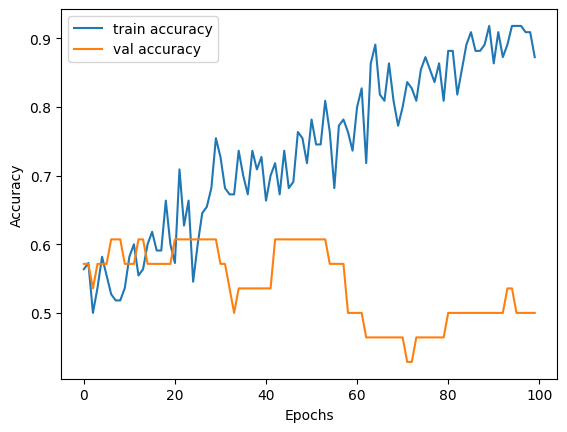

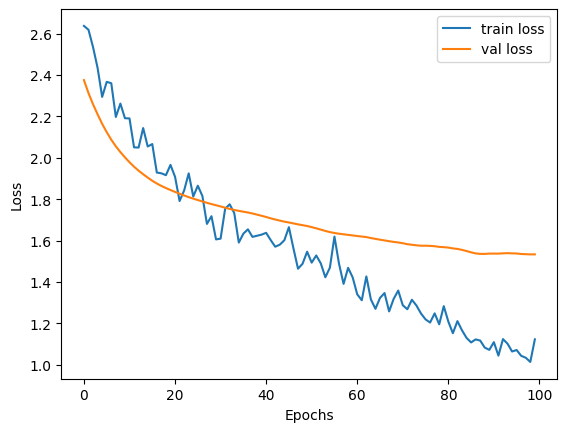

In [48]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Définition du modèle ajusté
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Définition de l'arrêt anticipé et réduction du taux d'apprentissage
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=0.00001)

# Entraînement du modèle avec Early Stopping et réduction du taux d'apprentissage
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=16, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.3863 - loss: 2.9559 - val_accuracy: 0.4643 - val_loss: 2.3261 - learning_rate: 0.0010
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5893 - loss: 2.5663 - val_accuracy: 0.4643 - val_loss: 2.2340 - learning_rate: 0.0010
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5334 - loss: 2.5393 - val_accuracy: 0.4286 - val_loss: 2.1585 - learning_rate: 0.0010
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5758 - loss: 2.3358 - val_accuracy: 0.4286 - val_loss: 2.0995 - learning_rate: 0.0010
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5826 - loss: 2.2519 - val_accuracy: 0.4286 - val_loss: 2.0507 - learning_rate: 0.0010
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6271 - loss: 2.0649 - val_accuracy: 0.4286 - val_loss: 2.0122 - learning_rate: 0.0010
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5346 - loss: 2.2436 - val_accuracy:

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Définition du modèle ajusté
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Définition de l'arrêt anticipé et réduction du taux d'apprentissage
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=0.00001)

# Entraînement du modèle avec Early Stopping et réduction du taux d'apprentissage
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=16, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - accuracy: 0.4179 - loss: 4.5652 - val_accuracy: 0.4643 - val_loss: 3.7469 - learning_rate: 0.0010
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5631 - loss: 3.9379 - val_accuracy: 0.5357 - val_loss: 3.5524 - learning_rate: 0.0010
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5594 - loss: 3.7226 - val_accuracy: 0.5714 - val_loss: 3.3962 - learning_rate: 0.0010
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4508 - loss: 3.7091 - val_accuracy: 0.5714 - val_loss: 3.2692 - learning_rate: 0.0010
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6158 - loss: 3.3608 - val_accuracy: 0.5714 - val_loss: 3.1664 - learning_rate: 0.0010
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5975 - loss: 3.2643 - val_accuracy: 0.5714 - val_loss: 3.0832 - learning_rate: 0.0010
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5543 - loss: 3.2268 - val_accuracy: 

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Définition du modèle amélioré
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compilation du modèle avec un optimiseur Adam et une learning rate par défaut
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Définition de l'arrêt anticipé et réduction du taux d'apprentissage
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Entraînement du modèle avec Early Stopping et réduction du taux d'apprentissage
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 209ms/step - accuracy: 0.5458 - loss: 1.5594 - val_accuracy: 0.3929 - val_loss: 1.2633 - learning_rate: 0.0010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5453 - loss: 1.4011 - val_accuracy: 0.4643 - val_loss: 1.2443 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5474 - loss: 1.3590 - val_accuracy: 0.5357 - val_loss: 1.2289 - learning_rate: 0.0010
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5812 - loss: 1.3353 - val_accuracy: 0.6071 - val_loss: 1.2152 - learning_rate: 0.0010
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5328 - loss: 1.4252 - val_accuracy: 0.5714 - val_loss: 1.2031 - learning_rate: 0.0010
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5328 - loss: 1.3487 - val_accuracy: 0.5357 - val_loss: 1.1931 - learning_rate: 0.0010
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7175 - loss: 1.1000 - val_accuracy:

# On test maintenant à partir d'une image

In [53]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Charger le modèle
model = load_model('mushroom_classifier_model.h5')

# Préparer l'image pour la prédiction
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normaliser les valeurs entre 0 et 1
    return img_array

# Fonction pour prédire si un champignon est toxique ou non
def predict_mushroom(img_path):
    img_array = prepare_image(img_path)
    prediction = model.predict(img_array)
    prob = prediction[0][0]
    return prob

# Chemin de l'image à prédire
img_path = r'C:\Users\Aerlaw\Pictures\IA\champignon_toxique.jpg'

# Faire une prédiction
prob = predict_mushroom(img_path)

# Afficher les résultats
print("Probabilité que le champignon soit toxique :", prob)

# Décision basée sur la probabilité
if prob > 0.5:
    print("Le modèle pense que le champignon est toxique.")
else:
    print("Le modèle pense que le champignon n'est pas toxique.")

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(1, 128, 128, 3), dtype=float32). Expected shape (None, 496), but input has incompatible shape (1, 128, 128, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 128, 128, 3), dtype=float32)
  • training=False
  • mask=None

In [54]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Charger le modèle
model = load_model('mushroom_classifier_model.h5')

# Préparer l'image pour la prédiction
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normaliser les valeurs entre 0 et 1
    return img_array

# Fonction pour prédire si un champignon est toxique ou non
def predict_mushroom(img_path):
    img_array = prepare_image(img_path)
    prediction = model.predict(img_array)
    prob = prediction[0][0]
    return prob

# Chemin de l'image à prédire
img_path = r'C:\Users\Aerlaw\Pictures\IA\champignon_toxique.jpg'

# Faire une prédiction
prob = predict_mushroom(img_path)

# Afficher les résultats
print("Probabilité que le champignon soit toxique :", prob)

# Décision basée sur la probabilité
if prob > 0.5:
    print("Le modèle pense que le champignon est toxique.")
else:
    print("Le modèle pense que le champignon n'est pas toxique.")

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(1, 128, 128, 3), dtype=float32). Expected shape (None, 496), but input has incompatible shape (1, 128, 128, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 128, 128, 3), dtype=float32)
  • training=False
  • mask=None